<a href="https://colab.research.google.com/github/Deepmidnight/Midnight_nebula/blob/main/Correlation_and_correlation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашнее задание к лекции «Корреляция и корреляционный анализ»**

**Задание 1.**
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков

**Задание 2.**
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Deepmidnight/Midnight_nebula/main/water.csv')
df = df[['location', 'town', 'hardness', 'mortality']]
df

,location,town,hardness,mortality
0,South,Bath,105,1247
1,North,Birkenhead,17,1668
2,South,Birmingham,5,1466
3,North,Blackburn,14,1800
4,North,Blackpool,18,1609
...,...,...,...,...
56,South,Walsall,60,1527
57,South,West Bromwich,53,1627
58,South,West Ham,122,1486
59,South,Wolverhampton,81,1485


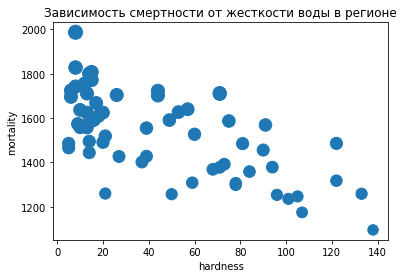

In [10]:
# Зависимость смертности от жёсткости воды в регионе
df.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        s=df['mortality']*0.1,
        title='Зависимость смертности от жесткости воды в регионе')
# В графике наблюдается обратная линейная зависимость смертности населения Южных и Северных территорий от степени жёсткости воды. 
# Чем меньше жёсткость воды, тем выше смертность.

In [11]:
# коэффициент корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [12]:
# коэффициент корреляции Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [13]:
# создаём тестовую выборку и обучаем её
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
model.coef_

array([-3.00985031])

In [15]:
model.intercept_

1672.2563978062308

In [16]:
y_pred = model.predict(X_test)
y_pred

array([1256.8970547 , 1446.51762438, 1389.33046844, 1618.07909218,
       1624.09879281, 1524.7737325 , 1654.19729593, 1458.55702563,
       1554.87223562, 1633.12834375, 1539.82298406, 1630.11849343,
       1554.87223562, 1494.67522938, 1633.12834375, 1356.22211501])

In [17]:
# сравнение прогноза с фактическими данными
res_df = X_test.copy()
res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
25,138,1256.897055,1096
49,75,1446.517624,1587
21,94,1389.330468,1379
4,18,1618.079092,1609
26,16,1624.098793,1591
44,49,1524.773733,1591
36,6,1654.197296,1724
60,71,1458.557026,1378
16,39,1554.872236,1555
42,13,1633.128344,1711


In [18]:
# значение коэффициента детерминации
model.score(X_test, y_test) 

0.6015469181340375

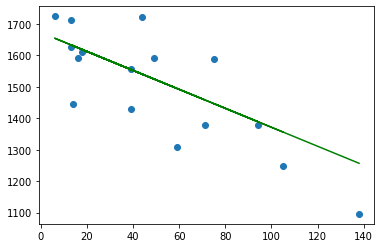

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='g')

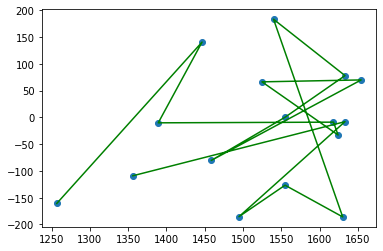

In [21]:
# График остатков
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='g')

Задание 2.1 (Южные территории)

In [22]:
south = df[df['location'] == 'South']
south.head()

,location,town,hardness,mortality
0,South,Bath,105,1247
2,South,Birmingham,5,1466
7,South,Bournemouth,78,1299
9,South,Brighton,84,1359
10,South,Bristol,73,1392


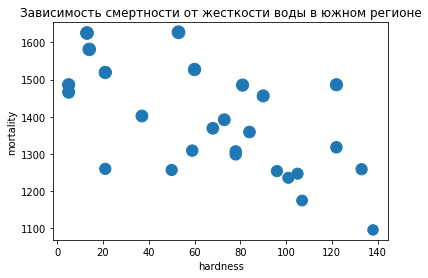

In [25]:
# Зависимость смертности от жёсткости воды в южном регионе
south.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        s=south['mortality']*0.1,
        title='Зависимость смертности от жесткости воды в южном регионе')
# На графике зависимости смертности от жесткости воды на южной территории, в связи с тем, что мы урезали данные так же наблюдается, но распределение менее плотное

In [26]:
# коэффициент корреляции Пирсона
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [27]:
# коэффициент корреляции Спирмена
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [29]:
X = south[['hardness']]
y = south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [31]:
# Обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
LinearRegression()

LinearRegression()

In [33]:
model.coef_

array([-2.12437592])

In [34]:
model.intercept_

1535.7344346549194

In [35]:
y_pred = model.predict(X_test)
y_pred

array([1308.42621145, 1363.65998532, 1253.19243759, 1429.51563877,
       1410.39625551, 1357.28685756])

In [37]:
# сравнение прогноза с фактическими данными
res_south = X_test.copy()
res_south['y_pred'] = y_pred
res_south['y_test'] = y_test
res_south

,hardness,y_pred,y_test
37,107,1308.426211,1175
59,81,1363.659985,1485
34,133,1253.192438,1259
48,50,1429.515639,1257
33,59,1410.396256,1309
9,84,1357.286858,1359


In [38]:
# значение коэффициента детерминации
model.score(X_test, y_test)

-0.28234399241250596

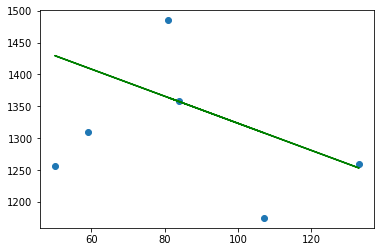

In [39]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='g')

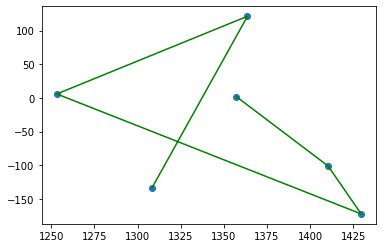

In [40]:
# график остатков
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='g')

In [41]:
# Задание 2.2 (Северные территории)
north = df[df['location'] == 'North']
north.head()

,location,town,hardness,mortality
1,North,Birkenhead,17,1668
3,North,Blackburn,14,1800
4,North,Blackpool,18,1609
5,North,Bolton,10,1558
6,North,Bootle,15,1807


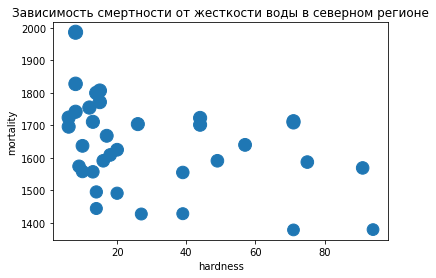

In [43]:
north.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        s=north['mortality']*0.1,
        title='Зависимость смертности от жесткости воды в северном регионе')

In [44]:
# коэффициент корреляции Пирсона
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [45]:
# коэффициент корреляции Спирмена
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [46]:
X = north[['hardness']]
y = north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [47]:
# обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [48]:
model.coef_

array([-2.44552444])

In [49]:
model.intercept_

1704.9845493178925

In [50]:
y_pred = model.predict(X_test)
y_pred

array([1660.96510944, 1682.97482938, 1690.31140269, 1565.58965638,
       1531.35231425, 1656.07406057, 1585.15385188])

In [51]:
# сравнение прогноза с фактическими данными
res_north = X_test.copy()
res_north['y_pred'] = y_pred
res_north['y_test'] = y_test
res_north

,hardness,y_pred,y_test
4,18,1660.965109,1609
23,9,1682.974829,1574
36,6,1690.311403,1724
52,57,1565.589656,1640
50,71,1531.352314,1713
55,20,1656.074061,1625
44,49,1585.153852,1591


In [52]:
# значение коэффициента детерминации
model.score(X_test, y_test)

-1.7179051379345012

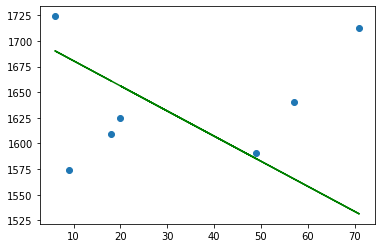

In [53]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='g')

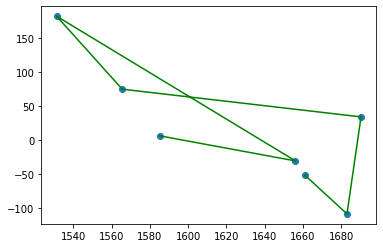

In [54]:
# график остатков
plt.scatter(y_pred, (y_test - y_pred))
plt.plot(y_pred, (y_test - y_pred), c='g')

В данных, разделенных на юг и север, мы видим меньшую плотность распределения величин, снизились коэфф-ты корреляции, коэффициенты детерминации стали отрицательными, ухудшилось качество моделей в сравнении с первоначальной моделью.

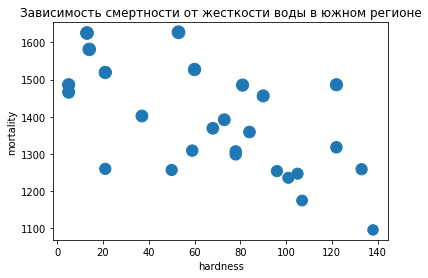

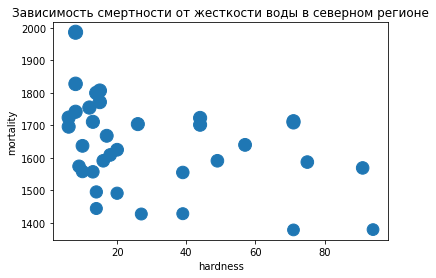

In [56]:
south.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        s=south['mortality']*0.1,
        title='Зависимость смертности от жесткости воды в южном регионе')
north.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        s=north['mortality']*0.1,
        title='Зависимость смертности от жесткости воды в северном регионе')

Сопоставляя данные после разделения на север и юг видно, что на южной территории данные распределены равномерно, а на севере наблюдается более плотное распределение данных в зоне с малой жесткостью воды и большей смертностью. Очевидно, что на севере преобладают зоны с малой жесткостью воды.